In [56]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Dataset/train.csv')
data

,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,1,11,2,16.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,2.0,1,12.0,60.0,Layak Minum
1,2,11,2,31.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,1.0,1.0,2,31.0,70.0,Layak Minum
2,3,11,2,12.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,4,11.0,75.0,Layak Minum
3,6,11,2,12.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,2.0,NaN,1.0,0.0,1.0,1,11.0,85.0,Layak Minum
4,7,11,2,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,2,11.0,65.0,Layak Minum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,47958,94,1,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,NaN,0.0,0.0,0.0,1,21.0,9.0,Layak Minum
35969,47959,94,1,12.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,12.0,Layak Minum
35970,47961,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1,11.0,48.0,Layak Minum
35971,47962,94,1,12.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,2,11.0,39.0,Layak Minum


In [3]:
data.drop('id', axis=1, inplace=True)

In [9]:
data['DC201'][data['DC201'] == 'Layak Minum'] = 0
data['DC201'][data['DC201'] == 'Tidak Layak Minum'] = 1
data['DC201'].fillna(0, inplace=True)
data['DC201'].astype(np.int64)

0        0
1        0
2        0
3        0
4        0
        ..
35968    0
35969    0
35970    0
35971    0
35972    0
Name: DC201, Length: 35973, dtype: int64

In [10]:
data['DC201'].unique()

array([0, 1], dtype=int64)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35973 entries, 0 to 35972
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DC024   35973 non-null  int64  
 1   DC025   35973 non-null  int64  
 2   DC205   35962 non-null  float64
 3   DC206   35952 non-null  float64
 4   DC207   35929 non-null  float64
 5   DC208   35960 non-null  float64
 6   DC209   35955 non-null  float64
 7   DC210   35932 non-null  float64
 8   DC211   35949 non-null  float64
 9   DC212   35949 non-null  float64
 10  DC213   35896 non-null  float64
 11  DC214   35964 non-null  float64
 12  DC215   35959 non-null  float64
 13  DC216   35934 non-null  float64
 14  DC217   35973 non-null  int64  
 15  DC219   35973 non-null  int64  
 16  DC220   35969 non-null  float64
 17  DC226   35967 non-null  float64
 18  DC230a  35962 non-null  float64
 19  DC230b  32964 non-null  float64
 20  DC232   32949 non-null  float64
 21  DC232b  32949 non-null  float64
 22

In [13]:
data.isna().sum()

DC024         0
DC025         0
DC205        11
DC206        21
DC207        44
DC208        13
DC209        18
DC210        41
DC211        24
DC212        24
DC213        77
DC214         9
DC215        14
DC216        39
DC217         0
DC219         0
DC220         4
DC226         6
DC230a       11
DC230b     3009
DC232      3024
DC232b     3024
DC235     10446
DC237        21
DC237a       37
DC237b       37
DC237c       37
DC237d       37
DC237e       37
DC237f       37
DC241       612
DC242      5374
DC244         4
DC246         9
DC252        14
DC270a        0
DC109        11
DC142a       52
DC201         0
dtype: int64

In [20]:
rf = RandomForestRegressor()

X = data.drop('DC201', axis=1)
y = data['DC201']
imp = IterativeImputer(estimator=rf, max_iter=10, verbose=2, missing_values=np.nan, imputation_order='roman', random_state=0)

X = imp.fit_transform(X)

[IterativeImputer] Completing matrix with shape (35973, 38)
[IterativeImputer] Ending imputation round 1/10, elapsed time 679.63
[IterativeImputer] Change: 218.88178363631303, scaled tolerance: 0.998 
[IterativeImputer] Ending imputation round 2/10, elapsed time 1409.11
[IterativeImputer] Change: 95.54000000000002, scaled tolerance: 0.998 
[IterativeImputer] Ending imputation round 3/10, elapsed time 2141.40
[IterativeImputer] Change: 93.83999999999997, scaled tolerance: 0.998 
[IterativeImputer] Ending imputation round 4/10, elapsed time 2871.07
[IterativeImputer] Change: 35.34999999999999, scaled tolerance: 0.998 
[IterativeImputer] Ending imputation round 5/10, elapsed time 3601.63
[IterativeImputer] Change: 58.39, scaled tolerance: 0.998 
[IterativeImputer] Ending imputation round 6/10, elapsed time 4351.74
[IterativeImputer] Change: 40.370000000000005, scaled tolerance: 0.998 
[IterativeImputer] Ending imputation round 7/10, elapsed time 5117.83
[IterativeImputer] Change: 72.0, sc

In [21]:
X

array([[11.,  2., 16., ...,  1., 12., 60.],
       [11.,  2., 31., ...,  2., 31., 70.],
       [11.,  2., 12., ...,  4., 11., 75.],
       ...,
       [94.,  1., 12., ...,  1., 11., 48.],
       [94.,  1., 12., ...,  2., 11., 39.],
       [94.,  1., 12., ...,  3., 11., 40.]])

In [22]:
features = data.drop('DC201', axis=1).columns.tolist()

X = pd.DataFrame(X, columns=features)
X

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,11.0,2.0,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.0,0.0,2.0,1.0,12.0,60.0
1,11.0,2.0,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.00,1.0,1.0,1.0,2.0,31.0,70.0
2,11.0,2.0,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.00,1.0,1.0,0.0,4.0,11.0,75.0
3,11.0,2.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.90,1.0,0.0,1.0,1.0,11.0,85.0
4,11.0,2.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.0,1.0,0.0,2.0,11.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,94.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.44,0.0,0.0,0.0,1.0,21.0,9.0
35969,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.00,0.0,0.0,0.0,2.0,11.0,12.0
35970,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.00,0.0,1.0,1.0,1.0,11.0,48.0
35971,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.00,0.0,0.0,0.0,2.0,11.0,39.0


In [24]:
rf_df = X.join(y)
rf_df

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a,DC201
0,11.0,2.0,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.00,0.0,0.0,2.0,1.0,12.0,60.0,0
1,11.0,2.0,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.00,1.0,1.0,1.0,2.0,31.0,70.0,0
2,11.0,2.0,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.00,1.0,1.0,0.0,4.0,11.0,75.0,0
3,11.0,2.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.90,1.0,0.0,1.0,1.0,11.0,85.0,0
4,11.0,2.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.00,0.0,1.0,0.0,2.0,11.0,65.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,94.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.44,0.0,0.0,0.0,1.0,21.0,9.0,0
35969,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.00,0.0,0.0,0.0,2.0,11.0,12.0,0
35970,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.00,0.0,1.0,1.0,1.0,11.0,48.0,0
35971,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.00,0.0,0.0,0.0,2.0,11.0,39.0,0


In [31]:
rf_df['DC201'].value_counts()[0]

32401

In [32]:
rf_df['DC201'].value_counts()[1]

3572

In [35]:
X, y = rf_df.iloc[:, :-1], rf_df.iloc[:, -1]

In [36]:
X

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,11.0,2.0,16.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.0,0.0,2.0,1.0,12.0,60.0
1,11.0,2.0,31.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.00,1.0,1.0,1.0,2.0,31.0,70.0
2,11.0,2.0,12.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.00,1.0,1.0,0.0,4.0,11.0,75.0
3,11.0,2.0,12.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,2.0,0.90,1.0,0.0,1.0,1.0,11.0,85.0
4,11.0,2.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.00,0.0,1.0,0.0,2.0,11.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35968,94.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.44,0.0,0.0,0.0,1.0,21.0,9.0
35969,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.00,0.0,0.0,0.0,2.0,11.0,12.0
35970,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.00,0.0,1.0,1.0,1.0,11.0,48.0
35971,94.0,1.0,12.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.00,0.0,0.0,0.0,2.0,11.0,39.0


In [37]:
y

0        0
1        0
2        0
3        0
4        0
        ..
35968    0
35969    0
35970    0
35971    0
35972    0
Name: DC201, Length: 35973, dtype: int64

In [40]:
X_shape, y_shape = sm().fit_resample(X, y)

In [41]:
print(Counter(y_shape))

Counter({0: 32401, 1: 32401})


In [44]:
X_shape.shape

(64802, 38)

In [55]:
pca = PCA()
X_pca = pca.fit_transform(X_shape)
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [54]:
pca.explained_variance_ratio_

array([0.84876925, 0.07838637])

In [49]:
df_reshape = X_shape.join(y_shape)
df_reshape.duplicated().sum()

4

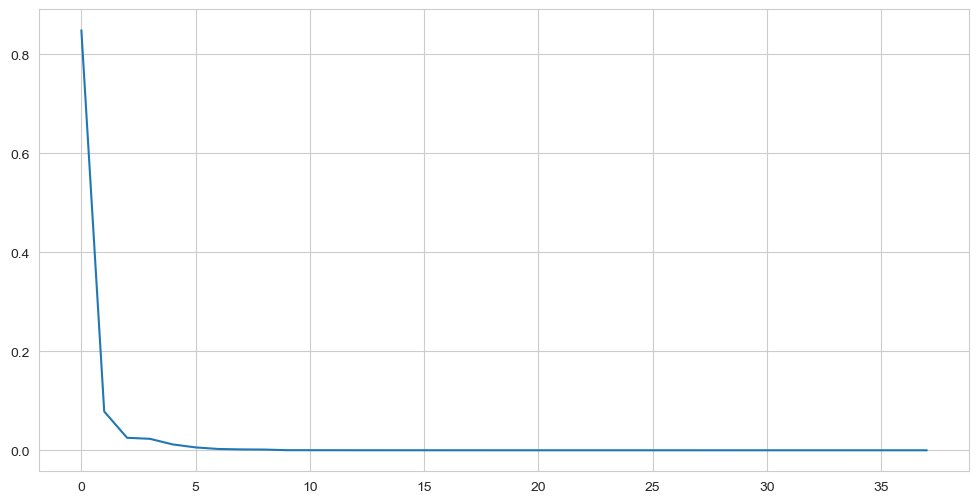

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(pca.explained_variance_ratio_)

In [ ]:
#rf_df.to_csv('Dataset/rf_df.csv')